<a href="https://colab.research.google.com/github/expeditive/machine-learning/blob/main/project/Wine_Qulaity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [4]:
wine_dataset = pd.read_csv('/content/WineQT.csv')

In [5]:
wine_dataset.shape

(1143, 13)

In [6]:
wine_dataset.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [10]:
wine_dataset = wine_dataset.drop(columns='Id',axis=1)

In [12]:
wine_dataset.shape

(1143, 12)

In [14]:
#checkng for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
wine_dataset.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043  
std       0.156664     0.170399     1.082196     0.805824  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.205000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

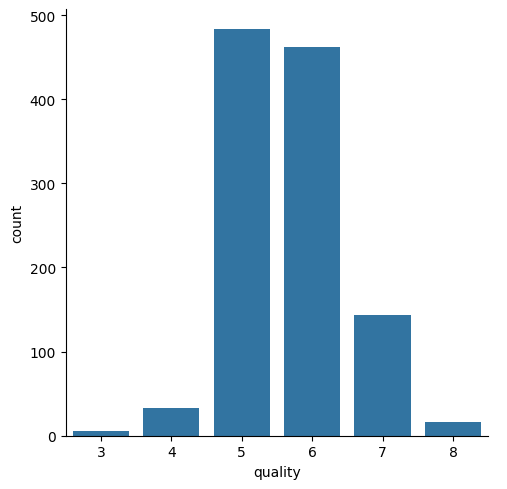

In [16]:
#number of vvalues for each quality
sns.catplot(x='quality',data =wine_dataset, kind= 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

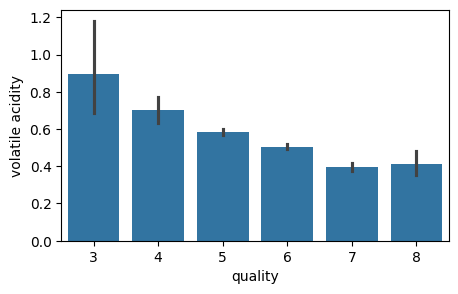

In [20]:
#volatile acidity vs quality
plot = plt.figure(figsize=(5,3))
sns.barplot(x='quality',y='volatile acidity',data = wine_dataset)
#we can see the inverse relation between quality and acidity

<Axes: xlabel='quality', ylabel='citric acid'>

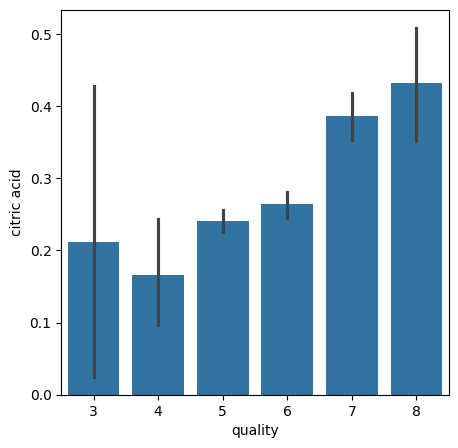

In [22]:
#citric acid vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data = wine_dataset)
#we can see the directly proportion relation between quality and acidity

correlation

In [23]:
correlation = wine_dataset.corr()

<Axes: >

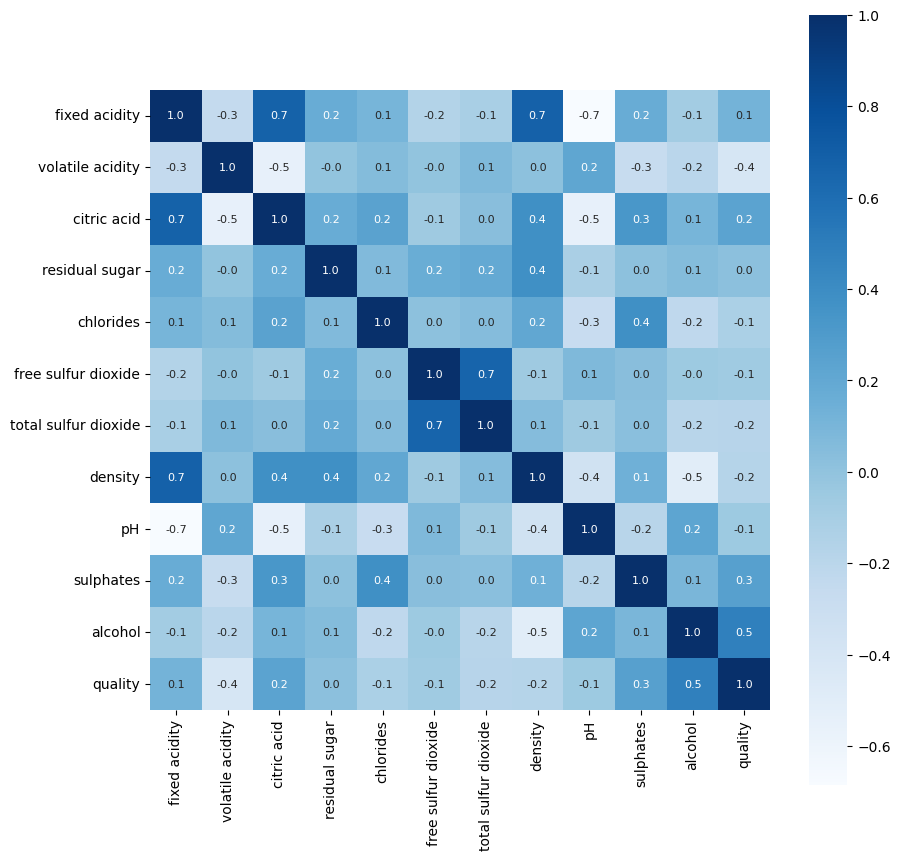

In [26]:
#constructing the heatmap to understand the correlation between coliumns
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap = 'Blues')

data preprocessing

In [27]:
#separate the data and label
X = wine_dataset.drop(columns='quality',axis=1)

In [28]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

Label binarization

In [30]:
Y = wine_dataset['quality'].apply(lambda y_value : 1 if y_value>=7 else 0)

In [31]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64


train test and split

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [34]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1143,) (914,) (229,)


model training

Random FOrest Classiifer

In [35]:
model = RandomForestClassifier()

In [36]:
model.fit(X_train,Y_train)

RandomForestClassifier()

model evaluation

In [37]:
#accurachy on test data
X_test_prediction = model.predict(X_test)

In [38]:
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [39]:
print(test_data_accuracy)

0.9126637554585153


Predicitive system

In [45]:
input_data =(11.6,0.41,0.54,1.5,0.095,22.0,41.0,0.99735,3.02,0.76,9.9)
input_np = np.asarray(input_data)
input_reshaped=input_np.reshape(1,-1)
prediction = model.predict(input_reshaped)
print(prediction)
if prediction[0]==1:
  print("Good Quality")
else:
  print("not good quality")

[1]
Good Quality


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
